# Lab | Imbalanced data

### Import and read file

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df=pd.read_csv('customer_churn.csv')

### EDA

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.drop(['customerID', 'gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod','TotalCharges' ], axis = 1, inplace = True) 

In [7]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [9]:
round(df.describe(),2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


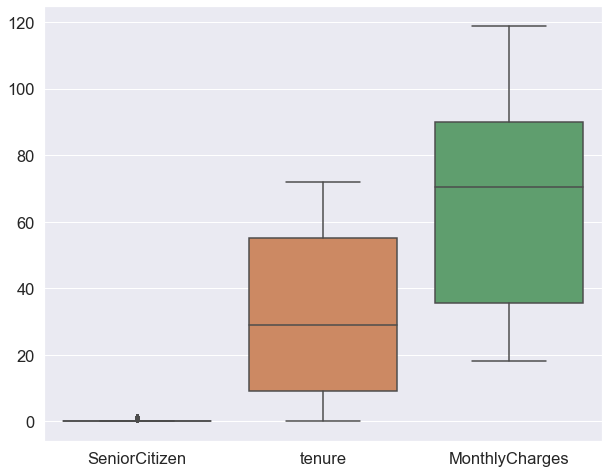

In [52]:
# check outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df);

In [10]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### check for correlations

In [13]:
corr_matrix = df.corr()

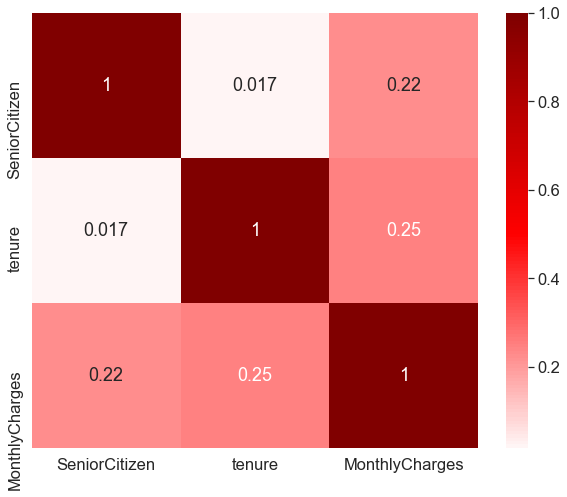

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,
           cmap='seismic',
           center=0,
           annot=True,
           );

### Modelling with logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [16]:
lr =LogisticRegression(max_iter=400)

In [17]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes


### Extracting the target variable

In [18]:
X = df.drop('Churn', axis=1)

In [19]:
y = df['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state=30)

In [21]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

### Evaluating the model

In [22]:
y_pred =lr.predict(X_test)
accuracy_score (y_test, y_pred)

0.7761476573592049

In [23]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [24]:
# confusion matrix
cnfmat=confusion_matrix(y_test,y_pred)

In [25]:
#setting up a data frame for the confusion matrix
df_cm= pd.DataFrame(cnfmat, columns=np.unique(y_test), index=np.unique(y_test))
df_cm

,No,Yes
No,1373,126
Yes,347,267


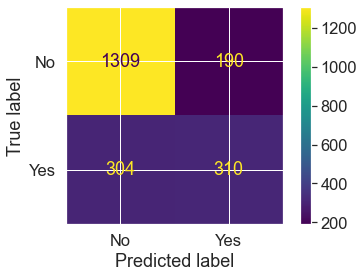

In [48]:
plot_confusion_matrix(lr, X_test, y_test);

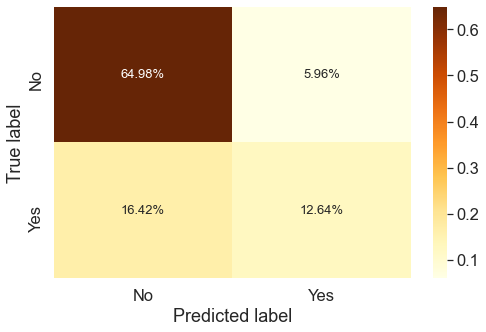

In [26]:
# set the names of the axis for the confusion matrix
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'
# setting the fontsize of the plot
sns.set(font_scale=1.5)
#setting the plot size
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

### Even a simple model will give us more than 70% accuracy. Why?

The target variable can only be 'yes or 'no', which translates to having 50% of accuracy. As we have trained the machine with a significant amoutn of data, there is been an improvement over this 50%

### Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [27]:
# Data Imbalance - review and possible mitigation

In [28]:
y_train.value_counts()

No     3675
Yes    1255
Name: Churn, dtype: int64

In [29]:
y_test.value_counts()

No     1499
Yes     614
Name: Churn, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [31]:
X_train_sm, y_train_sm =smote.fit_resample(X_train,y_train)

In [32]:
y_train.value_counts()

No     3675
Yes    1255
Name: Churn, dtype: int64

In [33]:
y_train_sm.value_counts()

No     3675
Yes    3675
Name: Churn, dtype: int64

In [34]:
#fit to train
lr.fit(X_train_sm,y_train_sm)

LogisticRegression(max_iter=400)

In [35]:
#create new predictions based on smote train
y_pred_sm=lr.predict(X_test)

In [36]:
#accuracy using smote train
accuracy_score(y_test,y_pred_sm)

0.7160435399905348

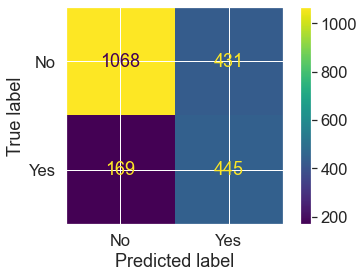

In [37]:
plot_confusion_matrix(lr, X_test, y_test);

The new oversampled model has lost overall accuracy but has gain balance and consistency as it has improved at prediction the 'Yes' and maintained at the same time good prediction for 'No'.

### Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [40]:
#Import tomerlinks

from imblearn.under_sampling import TomekLinks
tomek=TomekLinks(sampling_strategy='majority')

In [41]:
#apply tomek to train data set only
X_train_tk, y_train_tk =tomek.fit_resample(X_train,y_train)

In [42]:
#fit to train
lr.fit(X_train_tk,y_train_tk)

LogisticRegression(max_iter=400)

In [43]:
y_train_tk.value_counts()

No     3353
Yes    1255
Name: Churn, dtype: int64

In [44]:
y_train.value_counts()

No     3675
Yes    1255
Name: Churn, dtype: int64

In [45]:
y_pred_tk=lr.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred_tk)

0.7662091812588736

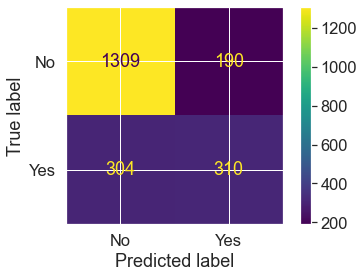

In [47]:
plot_confusion_matrix(lr, X_test, y_test)

Overall accuracy and 'No' prediction has improved. 'Yes' prediction is better than the original sample but worse than SMOTE model as has used less 'Yes' data.